In [1]:
#IMPORTS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math
from datetime import datetime

# Contexto

* A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

* Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.
Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

# Perguntas
1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

52# Carregamento e preparação dos dados

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print(f'Records: {df.shape[0]}  \nColumns: {df.shape[1]}')

Records: 21613  
Columns: 21


## Features disponíveis


**id** - Unique ID for each home sold

**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the apartments interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not

**view** - An index from 0 to 4 of how good the view of the property was

**condition** - An index from 1 to 5 on the condition of the apartment,

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

**sqft_above** - The square footage of the interior housing space that is above ground level

**sqft_basement** - The square footage of the interior housing space that is below ground level

**yr_built** - The year the house was initially built

**yr_renovated** - The year of the house’s last renovation

**zipcode** - What zipcode area the house is in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [6]:
round(df.describe(),2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


# Distribuição das features

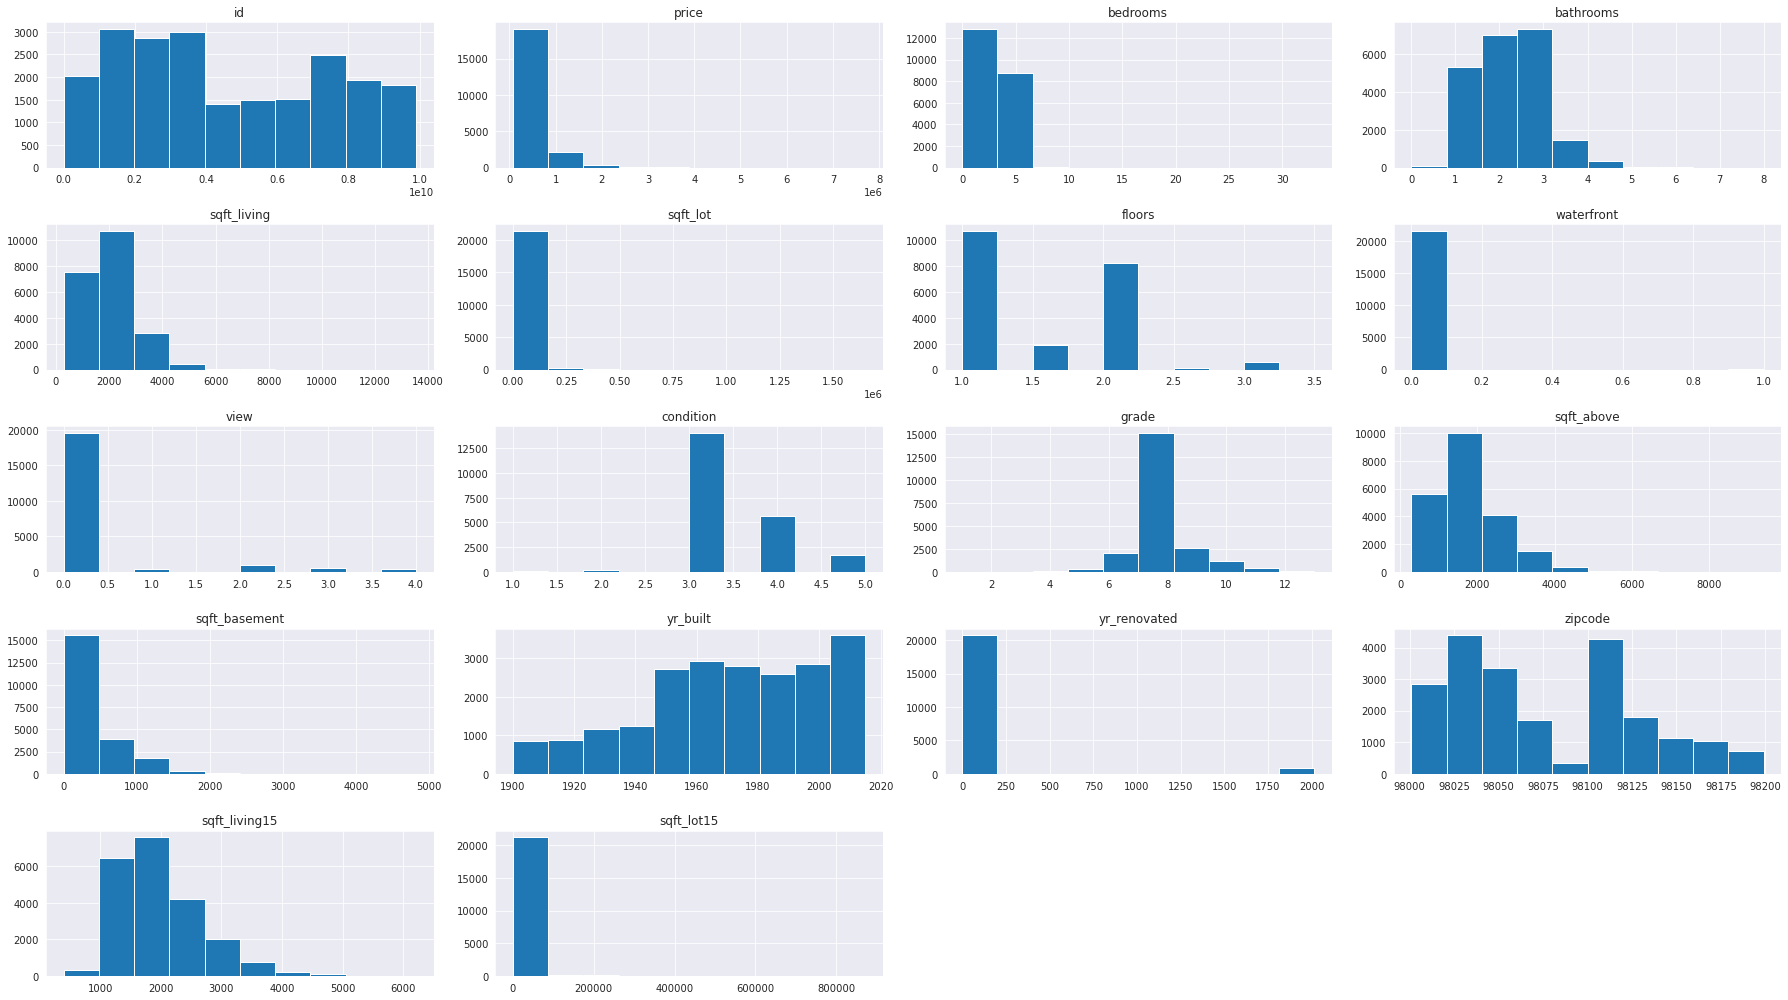

In [7]:

df.drop(['lat','long'], axis = 1).hist(figsize = (25,14))
plt.tight_layout()
plt.show()

As features parecem não ter distribuição normal e algumas apresentam viés positivo.

## Distribuição de faixas de preço de acordo com a localização

In [8]:
df['price_range'] = pd.qcut(x=df.price, q = 5)

In [299]:
df['price_per_sqft'] = df.apply(lambda x: x.price/x.sqft_living, axis = 1)

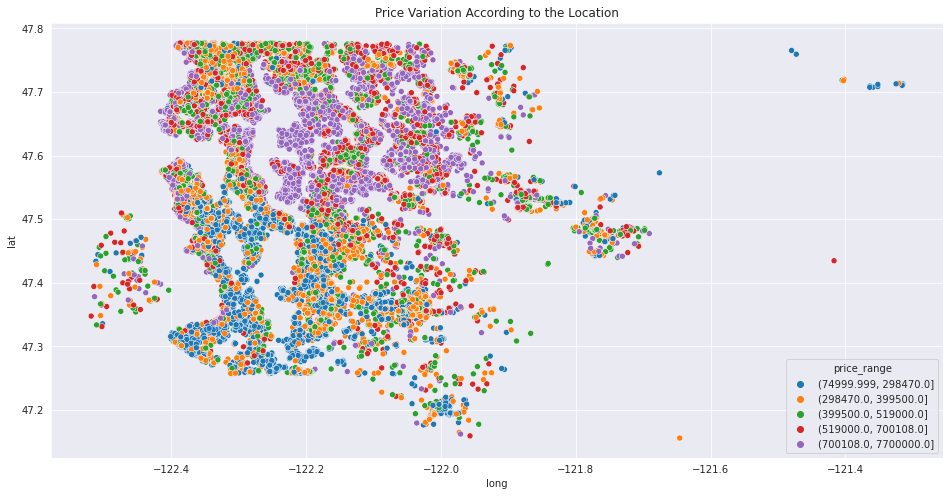

In [304]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = df, y='lat',x='long', hue = 'price_range')
plt.title('Price Variation According to the Location')
plt.show()

/tmp/ipykernel_4951/2345177786.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar().set_label('Price per square foot ($)', fontsize=14)


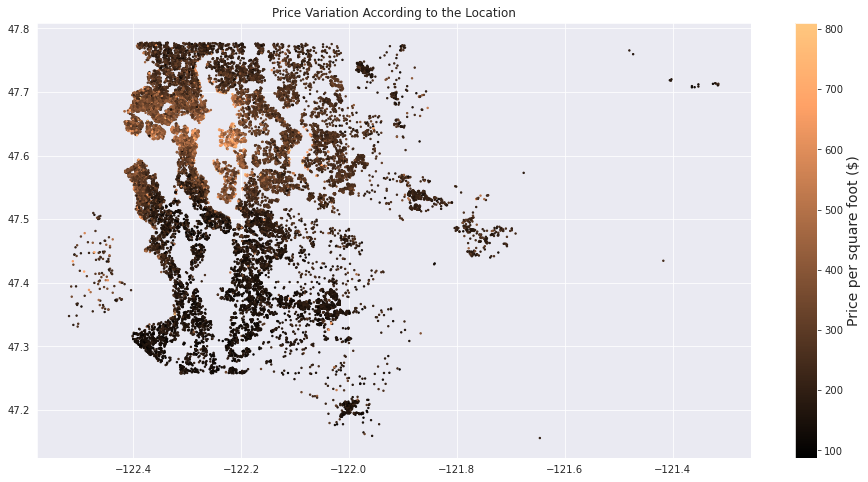

In [313]:
plt.figure(figsize=(16,8))
plt.scatter(x = df.long, y = df.lat, c = df.price_per_sqft, cmap = 'copper', s=2)
plt.colorbar().set_label('Price per square foot ($)', fontsize=14)
plt.title('Price Variation According to the Location')
plt.show()

* A regiao onde se concentra as casas mais valiosas é chamada de Bellevue e Medina, onde residem bilionários das indústrias de tecnologia. Ao redor localizam-se museus de arte, clubes de golf e tenis e outras reservas ambientais
* Parece haver uma região a oeste onde estão concentradas a maior parte das casa com maior faixa de valor. Casas mais a oeste parecem ser mais acessíveis.


## Variação de preços no tempo

In [10]:
#avg_month = df[['date', 'price']].set_index('date').resample('M').mean()

In [11]:
df.date = pd.to_datetime(df.date, format = '%Y%m%dT%H%M%S')

In [12]:
df['month_no'] = pd.DatetimeIndex(df.date).month
df['month'] = pd.DatetimeIndex(df.date).month_name()

In [13]:
months = df[['month','month_no']].drop_duplicates().sort_values(by='month_no')

In [14]:
months['month'] = months.month.str[:3]

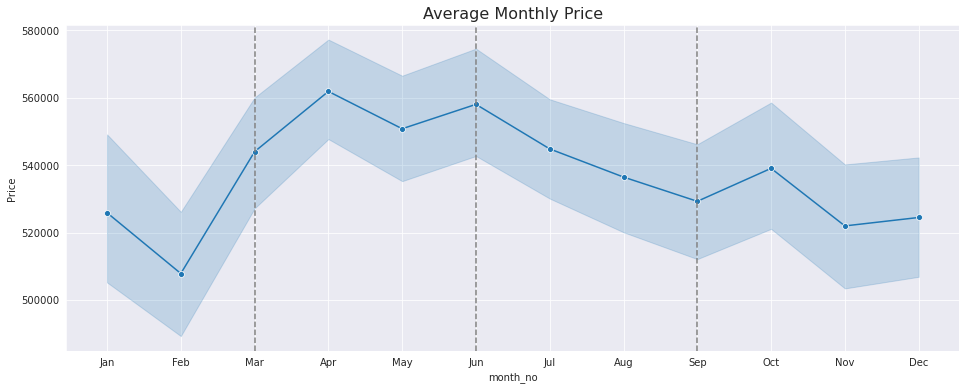

In [305]:
plt.figure(figsize = (16,6))
sns.lineplot(x='month_no', y='price', marker = 'o', data = df )
plt.xticks(ticks = months.month_no, labels = months.month)
plt.ylabel('Price')
plt.title('Average Monthly Price', fontsize = 16)
for v in range(3,12,3):
    plt.axvline(v, color = 'grey', linestyle = '--')

* É possível observar variações nos preços médios das casas durante o ano. 
* De Maio a Fevereiro há uma tendência decrescente nos preços.
* Como o período monitorado é de apenas um ano, não é possível confirmar se há uma sazonalidade que influencia essas variações. Entretanto, se houver, pode-se concluir que o período de fim/início de ano é a melhor época para compra dos imóveis e o período do meio do ano, entre abril e julho, é a melhor época para vendas.
* Entre o o período de menor e maior valor médio de compra, há uma variação de


In [322]:
(df.groupby('month_no')['price'].mean()[4] - df.groupby('month_no')['price'].mean()[2])/df.groupby('month_no')['price'].mean()[2]

0.10630355031085173

Text(0.5, 1.0, 'Price variation related to number of floors, grade, condition and if it is waterfront')

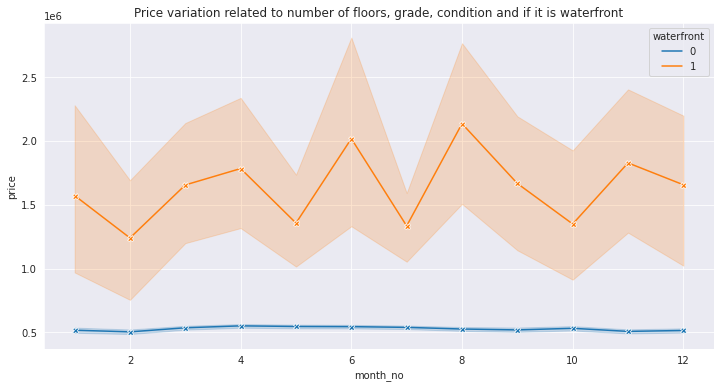

In [317]:
plt.figure(figsize=(12,6))

sns.lineplot(x='month_no', y='price', data = df, hue = 'waterfront', marker = 'X')
plt.title('Price variation related to number of floors, grade, condition and if it is waterfront')

O gráfico mostra que as casas de frente para o mar, em geral, são mais valiosas porém, tem uma variabilidade maior nos preços.

In [17]:
wseries = df.groupby('waterfront')['price'].mean()

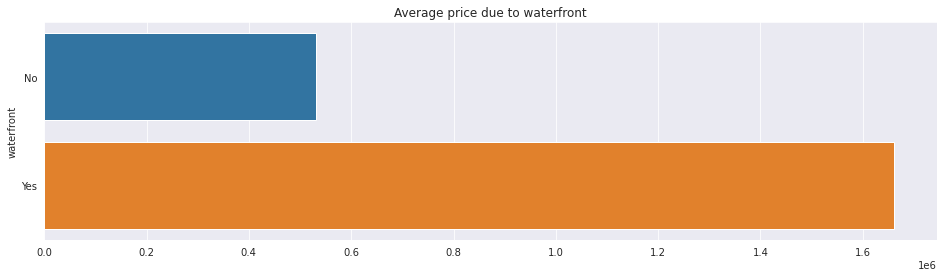

In [207]:
plt.figure(figsize = (16,4))
sns.barplot(y=wseries.index, x= wseries.values, orient = 'h')
plt.title('Average price due to waterfront')
plt.yticks(ticks = [0,1], labels = ['No','Yes'])
plt.show()

In [19]:
df.waterfront.value_counts(normalize = True)

0    0.992458
1    0.007542
Name: waterfront, dtype: float64

No entanto, apenas 0,7% das casas presentes no dataset apresentam essa característica.

# Correção dos tipos de algumas features

In [20]:
df.drop('id', axis = 1, inplace = True)

In [21]:
df.zipcode = pd.Categorical(df.zipcode)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

# Correlação entre o preço e demais features

In [23]:
df.corr().iloc[0,:].sort_values(ascending = False)[1:]

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
month_no        -0.010081
Name: price, dtype: float64

O resultado indica que as variáveis que mais afeta o preço final da casa é sua área habitável (sqft_living), condição de preservação das instalações e estrutura (grade) e área acima do nível do solo. É também importante o tamanho das casas próximas à casa em questão (sqft_living15). 

O resultado indica que o tamanho da área habitável, de forma geral, é um dos grandes influenciadores no preço final de compra/venda.

A feature mais relacionada às mudanças que a empresa pode promover no imóvel é a "condition" que avalia o estado de conservação do imóvel no momento da compra. A variável pode indicar oportunidades de reforma para valorizar o preço de venda.

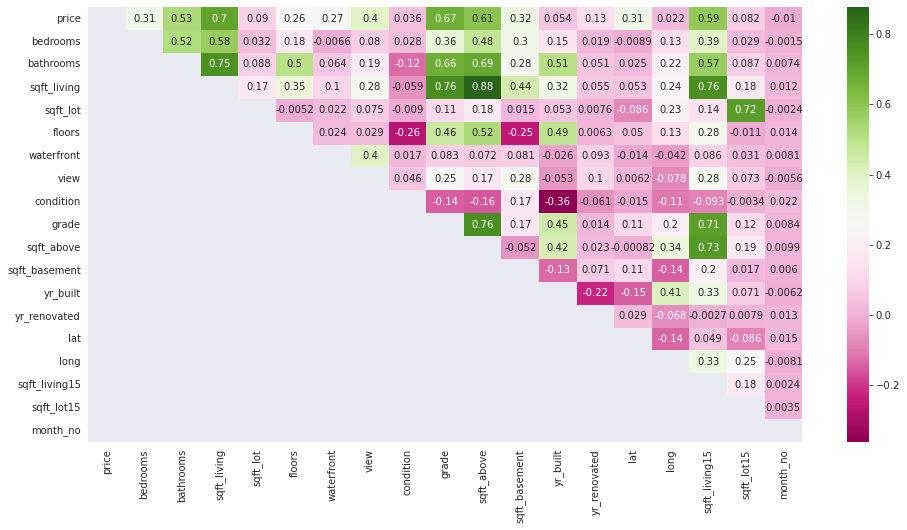

In [24]:
plt.figure(figsize = (16,8))
mask = np.tril(np.ones((df.corr()).shape), 0)
sns.heatmap(df.corr(), annot = True, mask = mask, cmap='PiYG')
plt.show()

In [25]:
df['sqft_livin_lot'] = df.sqft_living/df['sqft_lot']

In [26]:
df['sqft_livin_base'] = df.sqft_basement/df['sqft_living'] #  % de área habitável abaixo do nivel do solo
df['sqft_livin_above'] = df.sqft_above/df['sqft_living']   #  % de área habitável acima do nivel do solo


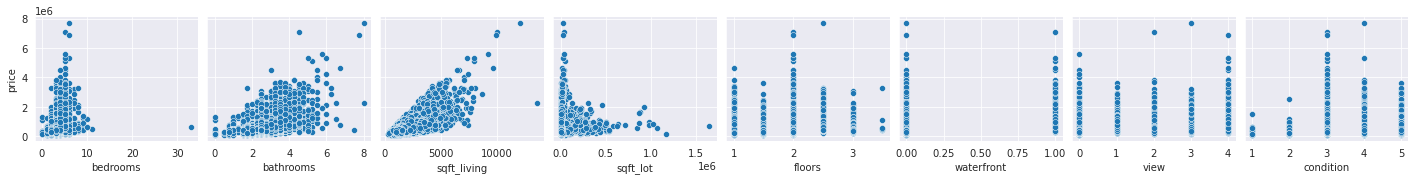

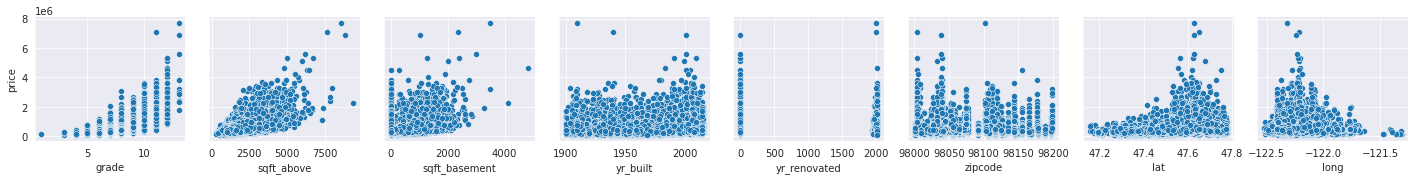

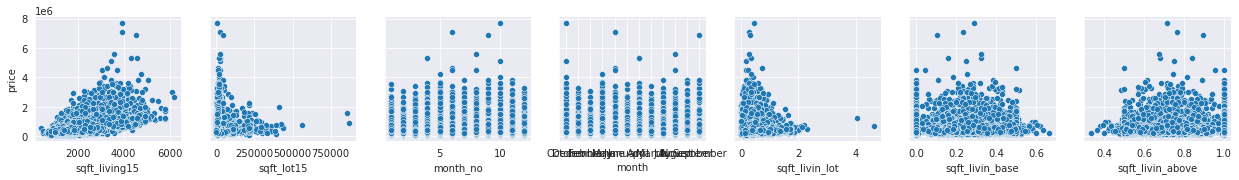

In [27]:
for i in range(2, len(df.columns), 8):
    sns.pairplot(df.drop('price_range',axis = 1), y_vars = 'price', x_vars = df.drop('price_range',axis = 1).columns[i:i+8].values)

Algumas variáveis parecem afetadas pela presença de outliers.

In [28]:
df_numerical = df.drop(['date','waterfront','grade','yr_built','yr_renovated','zipcode','lat','long','price_range', 'view'], axis = 1)

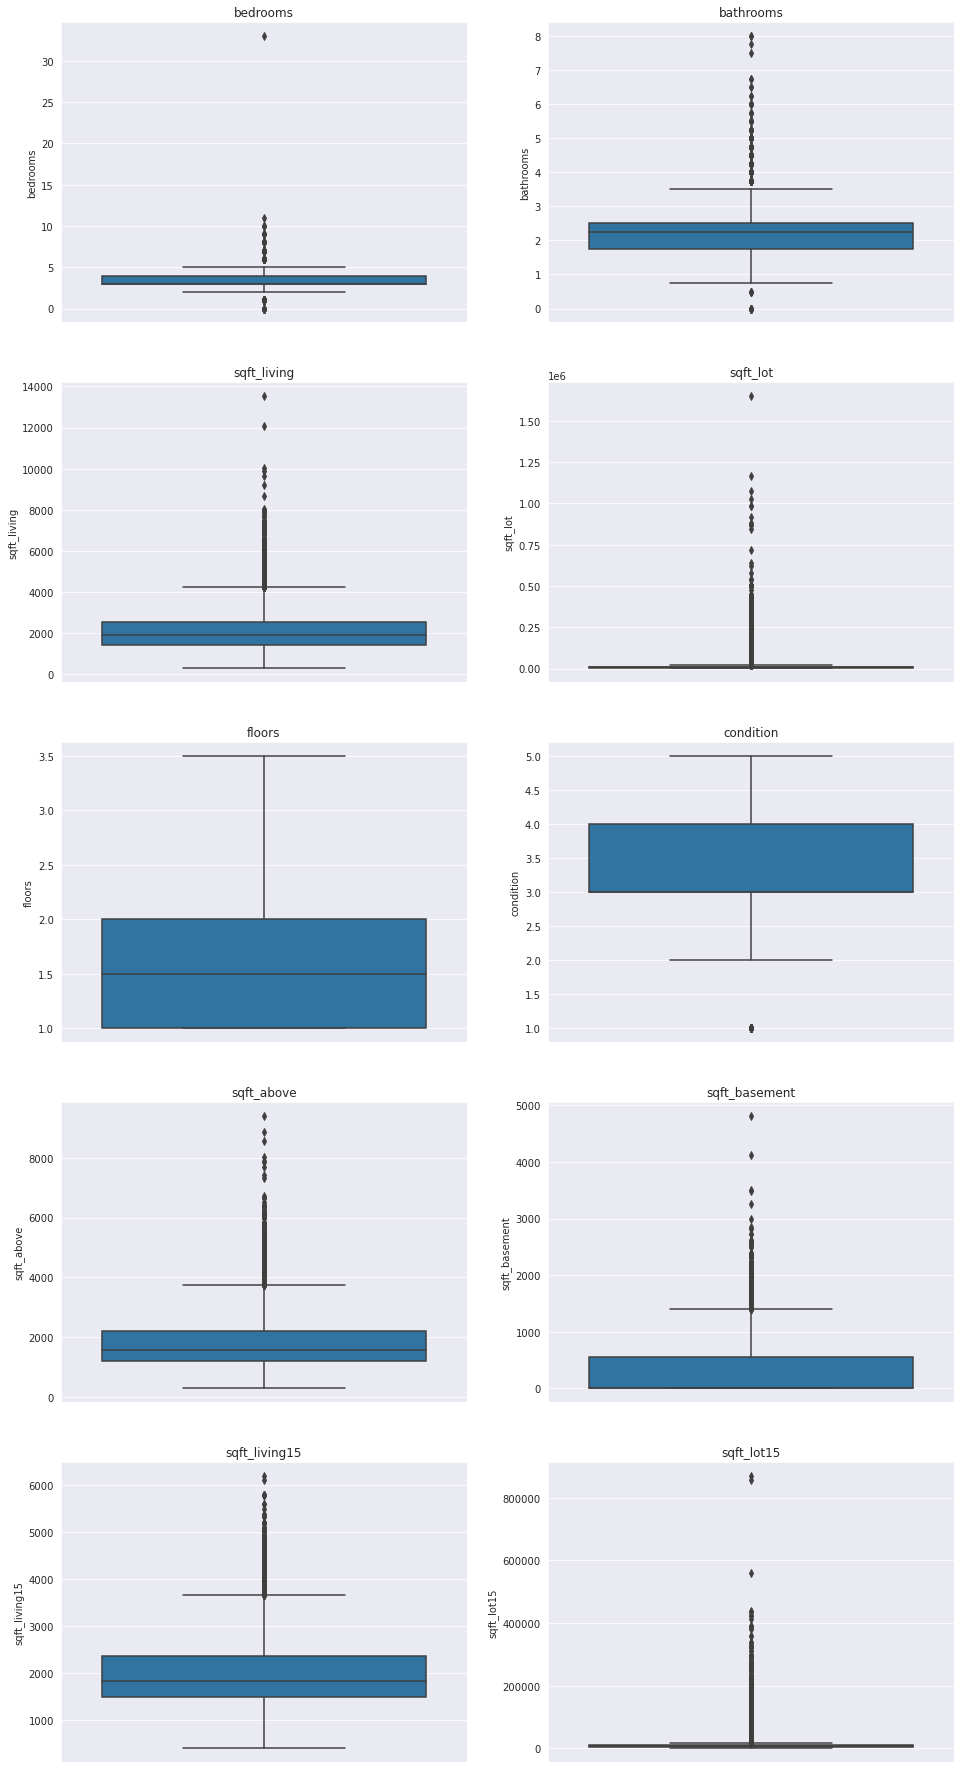

In [30]:
f, ax = plt.subplots(nrows=5, ncols = 2, figsize = (16,32))
rows=0
for i in range(1, 10, 2):
    
    ax[rows][0].set_title(df_numerical.columns[i])
    sns.boxplot(data = df_numerical, y=df_numerical.columns[i], ax = ax[rows][0])
    
    ax[rows][1].set_title(df_numerical.columns[i+1])
    sns.boxplot(data = df_numerical, y=df_numerical.columns[i+1], ax = ax[rows][1])
    rows+=1

Os boxplots mostram que algumas variáveis tem poucos valores que se distanciam razoavelmente dos demais. 

Vamos tentar refazer as análises com esses outliers removidos pelo critério de observação dos boxplots

In [52]:
df_or = df[(df.bedrooms <15) & (df.sqft_living < 11000) & (df.sqft_lot < 1250000) & (df.sqft_basement < 4000) & (df.sqft_lot15<500000) & (df.sqft_livin_lot<3)]

In [53]:
#Removendo variáveis não são numéricas
pp = df_or.drop(['zipcode', 'lat','long','month','month_no', 'waterfront','view','condition','yr_renovated','yr_built'], axis = 1)

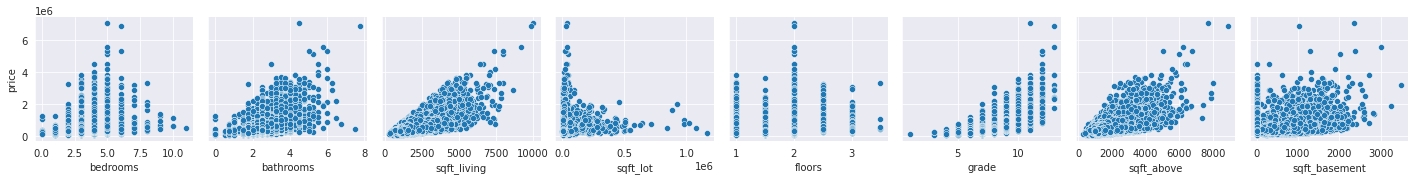

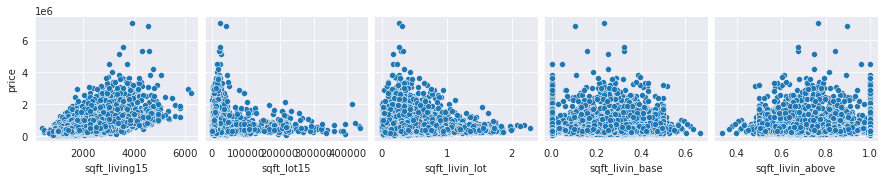

In [54]:
for i in range(2, len(pp.columns), 8):
    sns.pairplot(pp.drop('price_range',axis = 1), y_vars = 'price', x_vars = pp.drop('price_range',axis = 1).columns[i:i+8].values)

# Avaliando a variação no preço médio das casas de acordo com características do imóvel

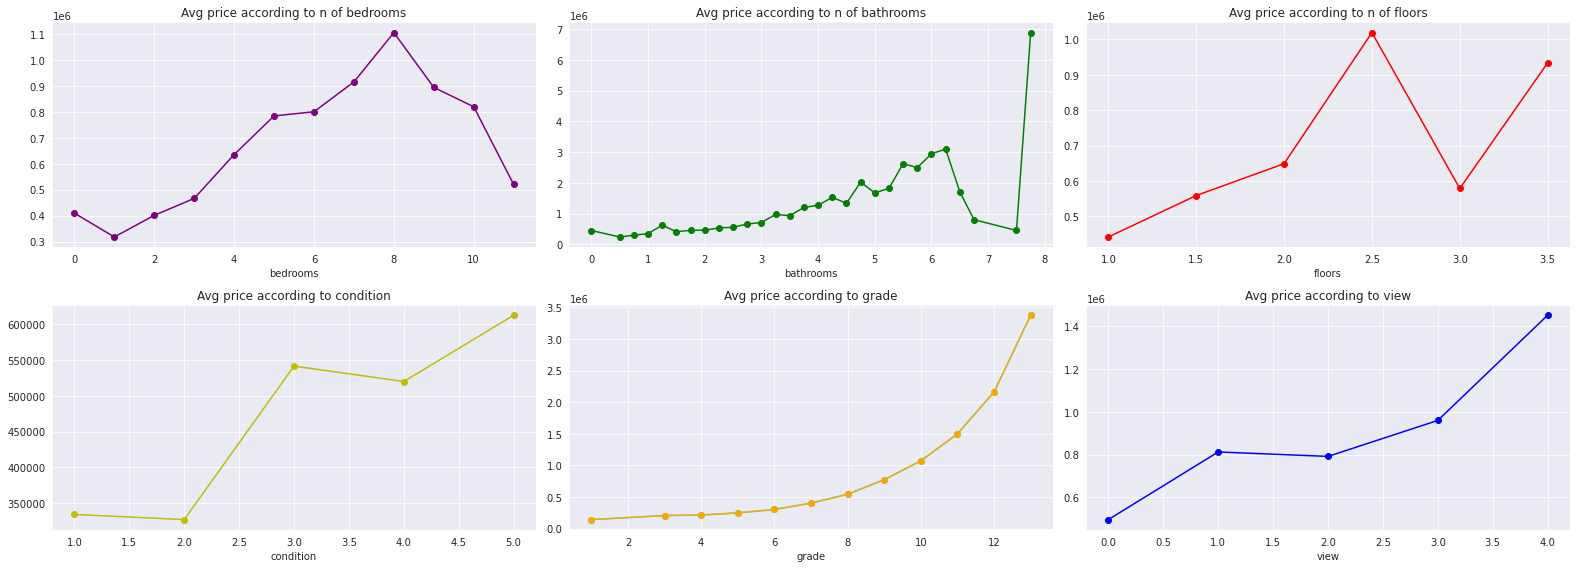

In [57]:
fig, ax = plt.subplots(nrows=2, ncols = 3, figsize=(22,8))

df_or.groupby(by='bedrooms').mean()['price'].plot(marker = 'o', ax = ax[0][0], color = 'purple')
ax[0][0].set_title('Avg price according to n of bedrooms')

df_or.groupby(by='bathrooms').mean()['price'].plot(marker = 'o', ax = ax[0][1], color = 'g')
ax[0][1].set_title('Avg price according to n of bathrooms')

df_or.groupby(by='floors').mean()['price'].plot(marker = 'o', ax = ax[0][2], color = 'r')
ax[0][2].set_title('Avg price according to n of floors')

df_or.groupby(by='condition').mean()['price'].plot(marker = 'o', ax = ax[1][0], color = 'y')
ax[1][0].set_title('Avg price according to condition')

df_or.groupby(by='grade').mean()['price'].plot(marker = 'o', ax = ax[1][1], color = 'cyan')
ax[1][1].set_title('Avg price according to grade')

df_or.groupby(by='grade').mean()['price'].plot(marker = 'o', ax = ax[1][1], color = 'orange')
ax[1][1].set_title('Avg price according to grade')

df_or.groupby(by='view').mean()['price'].plot(marker = 'o', ax = ax[1][2], color = 'blue')
ax[1][2].set_title('Avg price according to view')

plt.tight_layout()

A partir dos gráficos, é possível deduzir que:

* A casa parece valorizar de acordo com a quantidade de quartos até o pico de 8 quartos. Acima desse valor, deve haver uma menor procura dos clientes por este tipo de imóvel, o que pode contribuir para sua desvalorização.
* Parece também haver uma variação positiva, porém mais sutil até aproximadamente 6 banheiros e lavabos.
* A quantidade de pavimentos também parece ter influencia positiva até 2.5.
* O estado de conservação do imóvel parece atingir o ápice de valorização do imóvel no nível 3. Este resultado indica que pode ser uma boa alternativa adquirir casas no estado 2 e investir para eleva-laao estado 3 onde há um grande incremento na valorização do imóvel.
* A nota do design do imóvel parece ter uma relação quadrática com o preço.
* A qualidade da vista parece ter uma relação positiva com a valorização do imóvel

### Variação de preço de acordo com o incremento do número de quartos: 

In [128]:
bd = (df_or.groupby(by='bedrooms').mean()['price'] - df_or.groupby(by='bedrooms').mean()['price'].shift())[1:]
bt = (df_or.groupby(by='bathrooms').mean()['price'] - df_or.groupby(by='bathrooms').mean()['price'].shift())[1:]

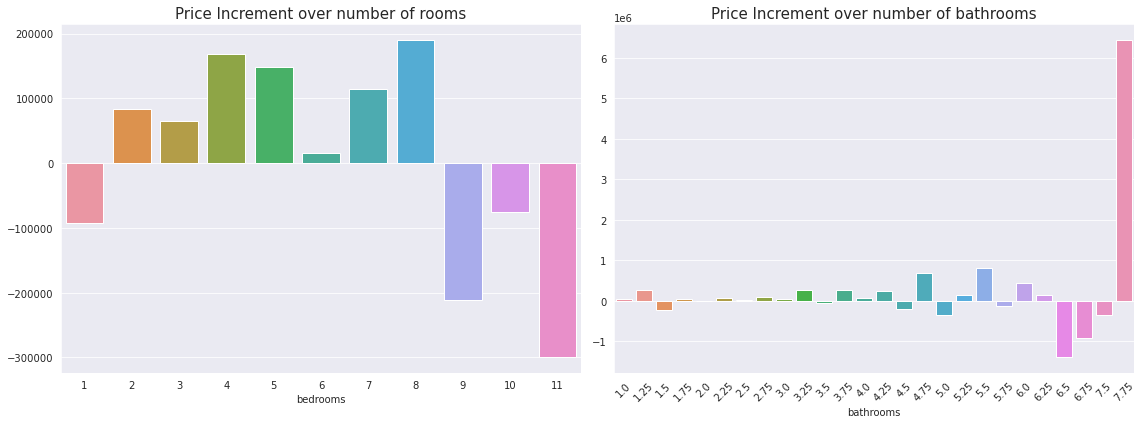

In [157]:
f, ax = plt.subplots(ncols = 2, figsize = (16,6), )

sns.barplot(x = bd.index, y = bd.values, ax = ax[0])
ax[0].set_title('Price Increment over number of rooms', fontsize = 15)

sns.barplot(x = bt.index, y = bt.values, ax = ax[1])
ax[1].set_title('Price Increment over number of bathrooms', fontsize = 15)
ax[1].set_xticklabels(labels = bt.index, rotation = 45)

plt.tight_layout()
plt.show()

Os maiores incrementos médios de preço ṕor número de quarto acontecem nas casas de 4 e 8 quartos.

### Avaliação da variação de preço e área habitável de acordo com a condição do imóvel

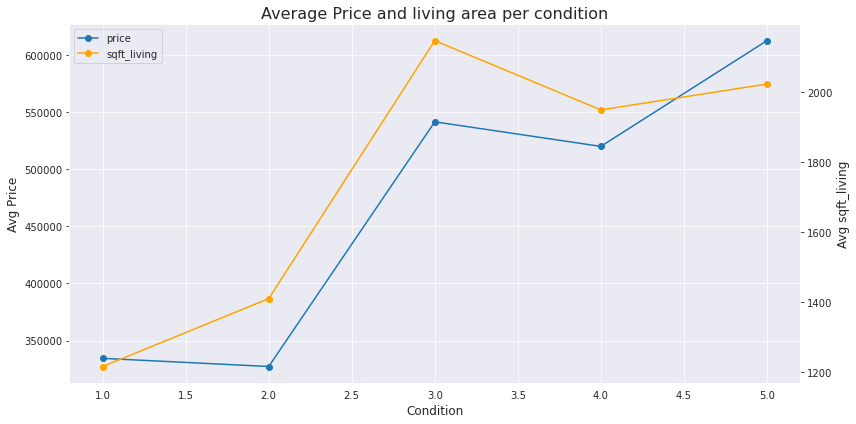

In [58]:
fig, ax =  plt.subplots(figsize=(12,6))

df_or.groupby(by='condition').mean()['price'].plot(marker = 'o', ax=ax, label = 'price')

ax1     =  ax.twinx()

df_or.groupby(by='condition').mean()['sqft_living'].plot(marker = 'o', ax = ax1, color = 'orange', label = 'sqft_living')

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax1.get_legend_handles_labels()

ax.set_ylabel('Avg Price', fontsize = 12)
ax1.set_ylabel('Avg sqft_living', fontsize = 12)
ax.set_xlabel('Condition', fontsize = 12)

ax.legend(handles = (lines_1+lines_2))
ax1.grid(False)

plt.title('Average Price and living area per condition', fontsize = 16)

plt.tight_layout()

* É possível observar através do gráfico que os imóveis em piores condições também são os menores (média de 1400ft²), enquanto que os maiores imóveis (média >2000ft²) encontra-se na condição 3. 
 
* A reforma para o nível 5 parece ser capaz de valorizar ainda mais o imóvel, acima ainda de imóveis com área habitável superior.

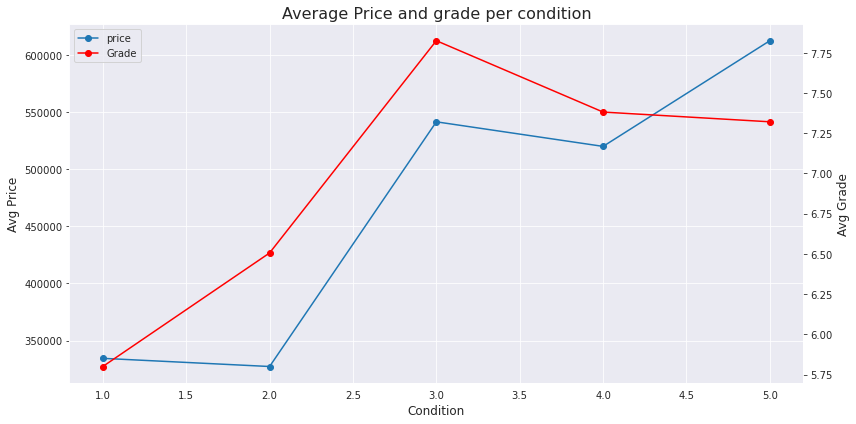

In [59]:
fig, ax =  plt.subplots(figsize=(12,6))

df_or.groupby(by='condition').mean()['price'].plot(marker = 'o', ax=ax, label = 'price')

ax1     =  ax.twinx()

df_or.groupby(by='condition').mean()['grade'].plot(marker = 'o', ax = ax1, color = 'red', label = 'Grade')

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax1.get_legend_handles_labels()

ax.set_ylabel('Avg Price', fontsize = 12)
ax1.set_ylabel('Avg Grade', fontsize = 12)
ax.set_xlabel('Condition', fontsize = 12)

ax.legend(handles = (lines_1+lines_2))
ax1.grid(False)
plt.title('Average Price and grade per condition', fontsize = 16)

plt.tight_layout()

Relacionando a condição com a nota da construção, parece que o design da construção também afeta pode ser responsável pela valorização do imóvel, podendo gerar um aumento exponencial no valor final conforme visto no quadro anterior (grade x price).

In [60]:
round((df_or.groupby(by='condition').mean()['price'][3] - df_or.groupby(by='condition').mean()['price'][2])/df_or.groupby(by='condition').mean()['price'][2]*100,2)

65.42

O resultado indica que há um aumento médio de 65,4% no valor do imóvel ao restaura-lo ao ponto que atinja uma estado de conservação nível 3.

<p>Há uma região no mapa que indica uma maior concentração de casa nas menores faixas de preço. Essas casas podem ser boas oportunidades de investimento para emprsa, por isso vamos promover uma análise desse entorno destacado no mapa abaixo.</p>

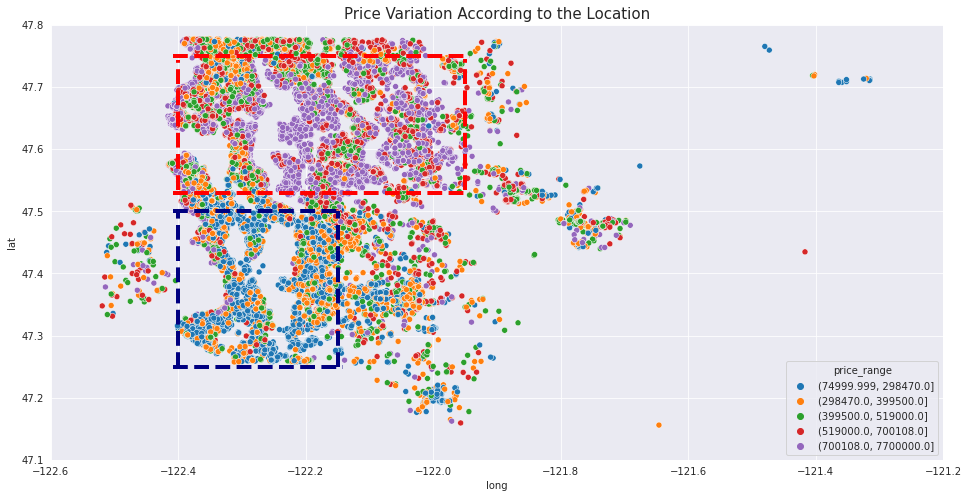

In [289]:
plt.figure(figsize=(16,8))

sns.scatterplot(data = df, y='lat',x='long', hue = 'price_range')
plt.ylim([47.1,47.8])
plt.xlim([-122.6,-121.2])

plt.title('Price Variation According to the Location', fontsize = 15)


plt.axvline(x= -122.4, ymin = 0.214, ymax = 0.572 , linestyle = '--', linewidth = 4, color = 'navy')
plt.axvline(x= -122.15, ymin = 0.214, ymax = 0.572, linestyle = '--', linewidth = 4, color = 'navy')

plt.axhline(y  = 47.25, xmin = 0.137, xmax = 0.327, linestyle = '--', linewidth = 4, color = 'navy')
plt.axhline(y = 47.5,xmin = 0.137, xmax = 0.327, linestyle = '--', linewidth = 4, color = 'navy')




plt.axvline(x= -122.4, ymin = 0.62, ymax = 0.92 , linestyle = '--', linewidth = 4, color = 'red')
plt.axvline(x= -121.95, ymin = 0.62, ymax = 0.922, linestyle = '--', linewidth = 4, color = 'red')

plt.axhline(y  = 47.53, xmin = 0.137, xmax = 0.47, linestyle = '--', linewidth = 4, color = 'red')
plt.axhline(y = 47.75,xmin = 0.137, xmax = 0.47, linestyle = '--', linewidth = 4, color = 'red')



plt.show()

O gráfico destaca as regiões onde parecem se concentrar as casas mais valorizadas (vermelho) e menos valorizadas (azul)

In [62]:
low_region = df[(df.lat>=47.25)&(df.lat<=47.5) & (df.long>=-122.4) & (df.long<=-122.15)]

In [254]:
high_region = df[(df.lat>=47.53)&(df.lat<=47.75) & (df.long>=-122.4) & (df.long<=-121.95)]

In [63]:
other_region = df[~((df.lat>=47.25)&(df.lat<=47.5) & (df.long>=-122.4) & (df.long<=-122.15))]

In [64]:
low_region.price.mean(), other_region.price.mean(), 

(303819.08383371826, 599281.8593415495)

In [65]:
print(f'Diferença média de preço das casas na região selecionada em relação às demais: {round(other_region.price.mean() - low_region.price.mean(),2)}')

Diferença média de preço das casas na região selecionada em relação às demais: 295462.78


In [ ]:
low_region['size_range'] = pd.qcut(x=low_region.sqft_living, q = 5)
low_region['price_range'] = pd.qcut(x=low_region.sqft_living, q = 5)

As casas menos valorizadas na região aparentam ter os menores terrenos habitáveis, o que confirma a importancia do tamanho da área do imóvel.

In [257]:
low_region.price.mean(), low_region.sqft_living.mean(), low_region.grade.mean() 

(303819.08383371826, 1870.1905311778291, 7.248960739030023)

In [258]:
high_region.price.mean(), high_region.sqft_living.mean(), high_region.grade.mean()

(668763.6484949833, 2154.481939799331, 7.868227424749164)

In [259]:
df.price.mean(), df.sqft_living.mean(), df.grade.mean()

(540088.1417665294, 2079.8997362698374, 7.656873178179799)

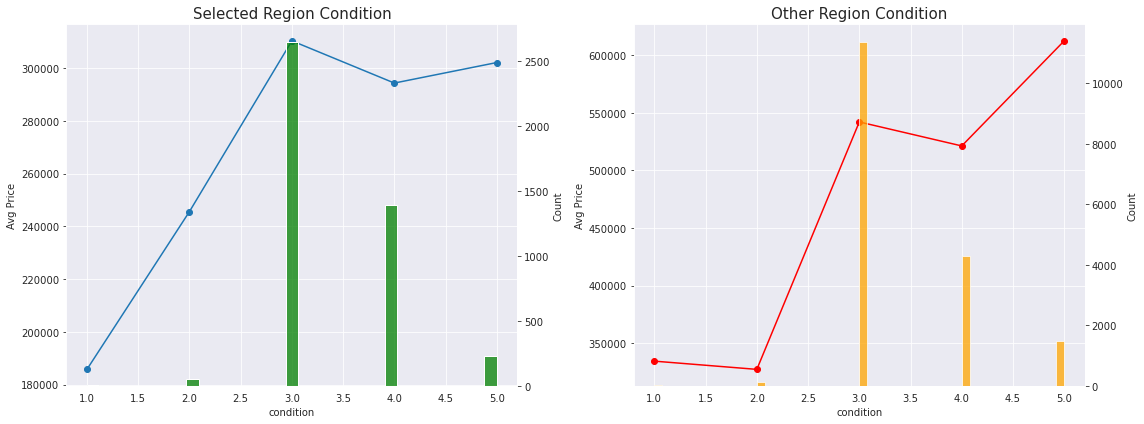

In [222]:
f, ax = plt.subplots(ncols = 2, figsize = (16,6))


low_region.groupby(by='condition').mean()['price'].plot(marker = 'o', ax = ax[0], label = 'price')
ax1     =  ax[0].twinx()
ax[0].set_ylabel('Avg Price')
sns.histplot(x = 'condition', ax = ax1, data = low_region, color = 'green')
ax1.set_title("Selected Region Condition", fontsize = 15)
ax1.grid(False)



df.groupby(by = 'condition').mean()['price'].plot(marker = 'o', label = 'price', ax = ax[1], color = 'red')
ax2     =  ax[1].twinx()
ax[1].set_ylabel('Avg Price')

sns.histplot(x = 'condition', ax = ax2, data = other_region, color = 'orange')
ax2.set_title("Other Region Condition", fontsize = 15)
ax2.grid(False)

plt.tight_layout()

plt.show()

De forma geral, existem poucasa casas na condição 2, mas ainda assim constituem uma oportunidade. Estas podem ser adquiridas a um preço menor e valorizadas mediante a reforma.

### Avaliando o efeito da renovação dos imóveis

In [172]:
df['last_renov'] = df.apply(lambda x: x.yr_renovated if x.yr_renovated > 0 else x.yr_built, axis = 1)

In [174]:
df['renov'] = df.yr_renovated.apply(lambda x: 1 if x>0 else 0)

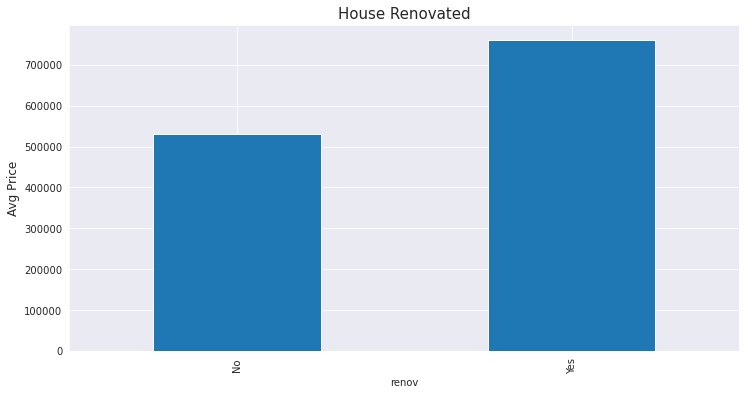

In [225]:
plt.figure(figsize = (12,6))
df.groupby('renov').mean()['price'].plot(kind = 'bar', )
plt.title("House Renovated", fontsize = 15)
plt.ylabel('Avg Price', fontsize = 12)
plt.xticks(ticks = [0,1], labels = ['No', 'Yes'])
plt.show()

In [214]:
print(f"Variação de: {round((df.groupby('renov').mean()['price'][1] - df.groupby('renov').mean()['price'][0])/(df.groupby('renov').mean()['price'][0])*100,2)} %")

Variação de: 43.37 %


O gráfico indica que as casas já renovadas são mais valorizadas que casas nunca renovada, com uma média de 43,37% de aumento

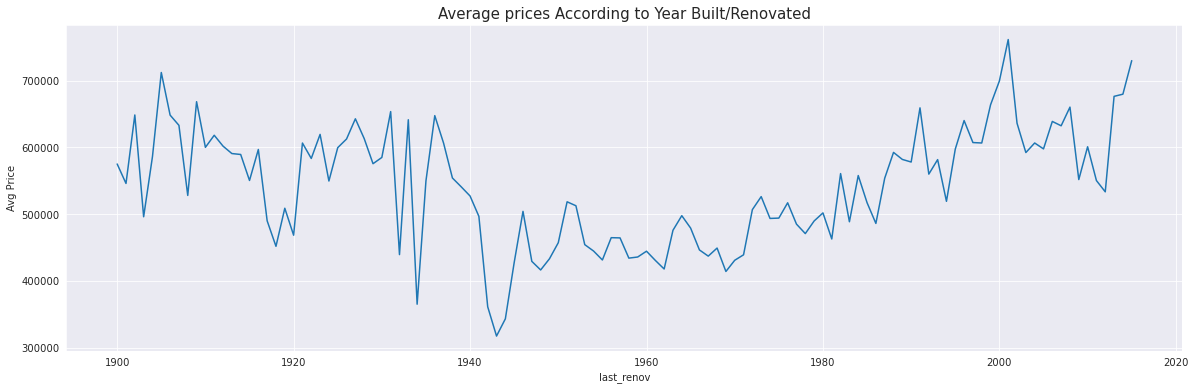

In [219]:
plt.figure(figsize=(20,6))
df.groupby('last_renov').mean()['price'].plot()
plt.title('Average prices According to Year Built/Renovated', fontsize = 15)
plt.ylabel('Avg Price')
plt.show()

Não parece haver uma relação direta entre o último ano da obra e o preço final da casa.